In [ ]:
import pandas as pd
import numpy as np

with open("/content/drive/MyDrive/Project/task2/base_data/fall381.txt", "rt") as f: 
    data = f.readlines()

    # print(data)

    # 레이더 1~4 값만 추출하기
    radar_li = []
    # for i in range(len(data)):
    for i in range(len(data)):
        radar = data[i].strip().split(',')
        radar = radar[2:6] 

        # for j in range(4):
        #     radar_li.append(float(radar[i][j]))
        radar_li.append(radar)
        for j in range(4):
            radar_li[i][j] = float(radar_li[i][j])
    print(radar_li)
    # radar_arr = np.array(radar_li)
    # print(radar_arr)
    

In [ ]:
col = ['Radar_1', 'Radar_2', 'Radar_3', 'Radar_4']
df_data = pd.DataFrame(data = radar_li, columns = col)
df_data

In [ ]:
df_data.replace(0, np.nan, inplace = True)
df_data

In [ ]:
df_data2 = df_data.copy()
df_data2.dropna(axis = 0, how = 'all', inplace = True)
df_data2.reset_index(inplace=True)
df_data2

In [ ]:
df_data3 = df_data2.copy()
df_data3.dropna(axis = 0, thresh = 3, inplace = True) # 값이 1개만 있는 데이터 삭제(전부 2개 이상 남음.)
df_data3.reset_index(drop = True, inplace = True)
df_data3

In [ ]:
# interpolate 함수를 써서 보간하기. 
df_data4 = df_data3.copy()
df_data4.interpolate(limit_direction= 'both', method = 'linear', inplace = True)

In [ ]:
df_data4

In [ ]:
df_data.isnull().sum()

In [ ]:
df_data4.isnull().sum()

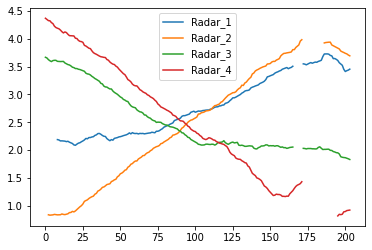

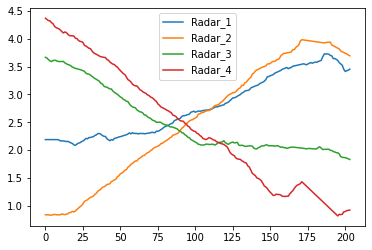

In [ ]:
df_data3.plot(y = col) # 보간하기전 데이터값
df_data4.plot(y = col) # 보간후 데이터값

In [ ]:
df_data5 = df_data3.copy()
df_data5.interpolate(limit_direction='both', mothod = 'polynomial', order = 2, inplace = True)

In [ ]:
df_data5.plot(y = col)

In [ ]:
df_data6 = df_data3.copy()
df_data6.interpolate(limit_direction='both', mothod = 'values',inplace = True)
df_data6.plot(y = col)

In [ ]:
# 객체 면적구하는 식 만들기

import math

def circle_area(r): # 원의 면적 구하기
    return (r**2) * 3.14


def theta(R, r, d): # 부채꼴의 내각구하기
    try:
        if abs(R - r) < d < R +r and R !=0 and r !=0:
            return 2 * math.acos((pow(d, 2) + pow(R, 2) - pow(r, 2)) / (2 * R * d))
        elif R + r <= d: # 두 원이 외부에서 겹치지 않는 경우
            return 0
        elif min(R, r) <= math.sqrt(pow(max(R, r),2) - pow(d, 2)): # 한 원의 부채꼴이 다른 원안에 포함되는 경우
            return 0
        elif R == 0 or r == 0 : # 레이더값이 존재하지 않는 경우
            return 0
    except ZeroDivisionError:
        return 0


def intersection_area(R, r, d): # 부채꼴의 내각을 이용해서 교차면적 구하기
    t1 = theta(R, r, d)
    t2 = theta(r, R, d)
    return ((pow(R, 2) * (t1 - math.sin(t1)) + pow(r, 2) * (t2 - math.sin(t2))) / 2) / 2 # 교차면적은 1/2해줘야함.


def excess_area(R, d, diagonal_l, room_a): # 초과면적 구하기
    if R > d: # 반지름의 길이가 방길이를 초과하는 경우 초과면적이 발생함
        return ((pow(R, 2) * math.acos(d / R)) - ((math.sqrt(pow(R, 2) - pow(d, 2)) * d))) / 2
    elif  R >= diagonal_l: # 반지름의 길이가 대각선의 길이보다 큰 경우 초과면적은 부채꼴의 넓이 - 방넓이
        return ((R**2) * 3.14 / 4) - room_a 
    else:
        return 0


def circular_sector(R, r, d): # 사각형 내의 부채꼴의 면적 구하기(원의 넓이/4)
    if pow(R,2) >= math.sqrt(pow(r, 2) + pow(d, 2)): # 첫번째 원이 두번째 원을 잡아먹는 경우 첫번째 원 부채꼴의 크기 구하기
        return (R**2) * 3.14 / 4
    elif pow(r,2) >= math.sqrt(pow(R, 2) + pow(d, 2)): # 두번째 원이 첫번째 원을 잡아먹는 경우 첫번째 원의 값 0 처리하기
        return 0
    else: 
        return (R**2) * 3.14 / 4 


def target_section(room_a, circular_s, intersection_a, excess_a): # 최종 객체면적: 방면적 - 원넓이/4(부채꼴의 넓이) + 교차면적 + 초과면적
    return room_a - circular_s + intersection_a + excess_a 

In [ ]:
# 가로: 3.15m, 세로: 4.95m/ 각각의 레이더 좌표(원의 중심점) 입력
circle_center1 = (3.15, 0)
circle_center2 = (3.15, 4.95)
circle_center3 = (0, 0)
circle_center4 = (0, 4.95)

# 방의 넓이
w = 3.15
h = 4.95

room_area = w * h
diagonal_line = math.sqrt(pow(w, 2) + pow(h, 2))



In [ ]:
li = []
for i in range(len(df_data4)):
    a = df_data4['Radar_1'][i]
    li.append(a)

print(li)

In [ ]:
df_data4_arr = np.array(df_data4)
df_data4_radar1 = df_data4_arr[:,1]
df_data4_radar2 = df_data4_arr[:,2]
df_data4_radar3 = df_data4_arr[:,3]
df_data4_radar4 = df_data4_arr[:,4]
print(df_data4_radar1[0])
print(df_data4_radar1)
print()
print(df_data4_radar2)


In [ ]:
# 가로: 3.15m, 세로: 4.95m/ 각각의 레이더 좌표(원의 중심점) 입력
circle_center1 = (3.15, 0)
circle_center2 = (3.15, 4.95)
circle_center3 = (0, 0)
circle_center4 = (0, 4.95)

# 방의 넓이
w = 3.15
h = 4.95

room_area = w * h
diagonal_line = math.sqrt(pow(w, 2) + pow(h, 2))

file_name = "fall381" # 파일이름 바꿔주기

target_li = []
for i in range(len(df_data4)):
        circle_radius1 = df_data4_radar1[i] # array에서 추출한 각각의 레이더 값 넣어주기
        # print(circle_radius1)
        circle_radius2 = df_data4_radar2[i]
        circle_radius3 = df_data4_radar3[i]
        circle_radius4 = df_data4_radar4[i]

        # 겹치는 두 원의 교차면적
        intersection_area1_2 = intersection_area(circle_radius1, circle_radius2, h)
        intersection_area2_4 = intersection_area(circle_radius2, circle_radius4, w)
        intersection_area4_3 = intersection_area(circle_radius4, circle_radius3, h)
        intersection_area3_1 = intersection_area(circle_radius3, circle_radius1, w)
        total_intersection_area = intersection_area1_2 + intersection_area2_4 + intersection_area4_3 + intersection_area3_1
        print("intersection_area: ", intersection_area1_2)

        # 각 원의 초과면적
        excess_area1_2 = excess_area(circle_radius1, w, diagonal_line, room_area)
        excess_area2_4 = excess_area(circle_radius2, w, diagonal_line, room_area)
        excess_area4_3 = excess_area(circle_radius4, w, diagonal_line, room_area)
        excess_area3_1 = excess_area(circle_radius3, w, diagonal_line, room_area)
        total_excess_area = excess_area1_2 + excess_area2_4 + excess_area4_3 + excess_area3_1
        print("total_excess_area: ", total_excess_area)

        # 부채꼴의 넓이
        circular_sector1 = circular_sector(circle_radius1, circle_radius2, h)
        circular_sector2 = circular_sector(circle_radius2, circle_radius4, w)
        circular_sector4 = circular_sector(circle_radius4, circle_radius3, h)
        circular_sector3 = circular_sector(circle_radius3, circle_radius1, w)
        total_circular_sector = circular_sector1 + circular_sector2 + circular_sector3 + circular_sector4
        print("total_circular_sector: ", total_circular_sector)

        # 최종 객체면적
        Final_target_section = target_section(room_area, total_circular_sector, total_intersection_area, total_excess_area)
        target_li.append(Final_target_section)

        print(file_name + "의 {}번째 객체면적은 : ".format(i+1), Final_target_section)
        print()


In [ ]:
print(target_li)

[0.6447862390107253, 0.6163944939069772, 0.5511932099430084, 0.5071959744861285, 0.48057304558387504, 0.5212624501595489, 0.5393288129780878, 0.5440841541581865, 0.5099362057232111, 0.5102675213908512, 0.5175146951108931, 0.5285537579669777, 0.5374410894456911, 0.4807873343821809, 0.4591974608388911, 0.44381473936323346, 0.4472430946521473, 0.42277252539954047, 0.3912057291750868, 0.3880740447213844, 1.6701013721704632, 1.725866891904913, 1.7697692389015542, 1.8139884729370772, 1.840656319082191, 1.8918749312933691, 1.9729083364194637, 1.9464104238105318, 1.9611238658527905, 1.99709346040062, 2.019323974230363, 2.013185210319346, 2.0101241486170207, 2.0523108103365626, 2.0640692102894462, 2.1272450510571694, 2.1383284440416324, 2.17606343147869, 2.261539394208811, 2.2773487648915673, 2.326632124852202, 2.411606659603684, 2.4467481105355584, 2.4793492195925726, 2.5551687224285318, 2.600328629773272, 2.6225368729469922, 2.6438389447173836, 2.7464207821143347, 2.789031924246822, 2.8814877

In [ ]:
df_data4['Target_section'] = target_li

In [ ]:
df_data4

# 다른 방법으로 보간하려고했던 시도

In [ ]:
df_data5 = df_data2.copy()
for i in range(len(df_data5)):
    if df_data5.loc[i].count() == 2: # 3개가 NaN인 값 드롭.
        df_data5.drop([i], inplace= True)

df_data5.reset_index(drop = True, inplace = True)
df_data5

In [ ]:
df_data5.isnull().sum()

In [ ]:
df_data6 = df_data5.copy()

In [ ]:
df_data6.head(10)

In [ ]:
df_data6.iloc[6:8].fillna(method = 'bfill')

In [ ]:
# for i in range(len(df_data5)):
while df_data5.iloc[0].count() < 3:
    for i in range(10):
        if df_data5.iloc[i].count() == 4:
            df_data5.iloc[i-2:i+1].fillna(method = 'ffill', inplace = True)
            if df_data5.iloc[i].count() == 4:
                df_data5.iloc[i:i+3].fillna(method = 'bfill',inplace = True)
df_data5.head(10)

In [ ]:
sum((df_data6.iloc[8:10,1]))/2

2.1862

In [ ]:
sum((df_data6.iloc[8:13,1]))/5

2.1737200000000003

In [ ]:
df_data6.iloc[7,1].fillna(sum((df_data6.iloc[8:13,1]))/5)

In [ ]:
df_data6

In [ ]:
# for i in range(len(df_data5)):
while df_data6.iloc[0].count() < 5:
    for i in range(10):
        if df_data6.iloc[i].count() == 4:
            df_data6.iloc[i,1].fillna(sum((df_data6.iloc[i-5:i,1]))/5,inplace = True)
            df_data6.iloc[i,2].fillna(sum((df_data6.iloc[i-5:i,2]))/5,inplace = True)
            df_data6.iloc[i,3].fillna(sum((df_data6.iloc[i-5:i,3]))/5,inplace = True)
            df_data6.iloc[i,4].fillna(sum((df_data6.iloc[i-5:i,4]))/5,inplace = True)
            if df_data6.iloc[i].count() == 4:
                df_data6.iloc[i,1].fillna(sum((df_data6.iloc[i:i+5,1]))/5,inplace = True)
                df_data6.iloc[i,2].fillna(sum((df_data6.iloc[i:i+5,2]))/5,inplace = True)
                df_data6.iloc[i,3].fillna(sum((df_data6.iloc[i:i+5,3]))/5,inplace = True)
                df_data6.iloc[i,4].fillna(sum((df_data6.iloc[i:i+5,4]))/5,inplace = True)
df_data6.head(10)